In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib notebook
import missingno as msno
import seaborn as sns; sns.set(style='ticks', context='talk')
from sklearn import preprocessing
import cartopy
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import glob
from geopandas import GeoDataFrame
from shapely.geometry import Point
import geopandas as gpd
import itertools
import hypertools as hyp
mapbox = cimgt.MapboxTiles('pk.eyJ1IjoiamVzc2VwaXNlbCIsImEiOiJjamdmaHlxajkybnhmMnFtcXppaW90bDVjIn0.i2qzLErAxTjsmwl127P-jQ', 'mapbox.high-contrast')

In [2]:
nure=pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\nure.csv', encoding ='iso-8859-1', parse_dates=['sampdat'])
le = preprocessing.LabelEncoder()
le.fit(nure.methods)
list(le.classes_)
cats = le.transform(nure.methods) 

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19,20,28,29,31,35,46,47,48,66,68,79,145) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Traceback (most recent call last):
  File "C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colorbar.py", line 957, in on_mappable_changed
    self.update_normal(mappable)
  File "C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colorbar.py", line 987, in update_normal
    self.draw_all()
  File "C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colorbar.py", line 353, in draw_all
    self._config_axes(X, Y)
  File "C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colorbar.py", line 461, in _config_axes
    self.update_ticks()
  

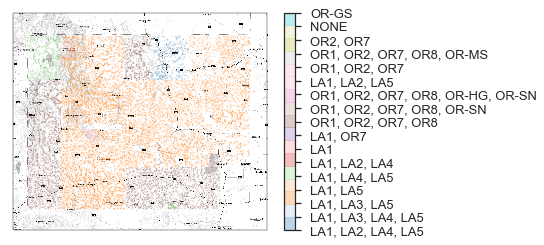

In [48]:
ax = plt.axes(projection=mapbox.crs)
ax.add_image(mapbox, 8)

ax.set_extent([-111.5,-103.5,40.5,45.5])
#plt.scatter(nure.longitude, nure.latitude, c=cats, s=0.4, transform=ccrs.Geodetic(), alpha=0.3)
plt.scatter(nure.longitude, nure.latitude, c=cats, s=0.4, alpha=0.3, cmap=plt.cm.get_cmap('tab20', 17),transform=ccrs.Geodetic())
formatter = plt.FuncFormatter(lambda val, loc: nure.methods.unique()[val])
plt.colorbar(ticks=[0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], format=formatter);
plt.clim(-0.5, 17)
plt.savefig(r'J:\\Geology\\WSGS\\Projects\\Critical Minerals\\Report\\figure1a.png', dpi=600)

In [12]:
ref = pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\ngdbrock-fUS56\tblRockGeoData.csv', index_col = [0])
path = r'J:\\Geology\\WSGS\\Projects\\Critical Minerals\\ngdbrock-fUS56\\ngdbrock-fUS56\\'
allFiles=glob.glob(path+"*.csv")
analysis = pd.DataFrame
moving = []
for file in allFiles:
    types = pd.read_csv(file)
    moving.append(types)
analysis = pd.concat(moving, sort=False)
    
    
merged = ref.merge(analysis, on='lab_id')
merged.drop(columns=['br_ppm', 'ir_ppm','rn_ppm', 'i_ppm', 'ir_ppb', 'au_ppb'], inplace=True)
merged['tracking'] = np.arange(0,len(merged))

le = preprocessing.LabelEncoder()
le.fit(merged.method)
list(le.classes_)
cats = le.transform(merged.method) 

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (12,14,26,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


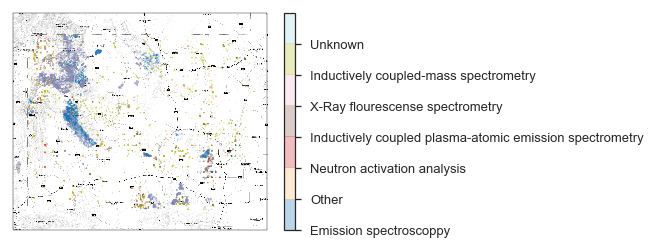

In [92]:
ax = plt.axes(projection=mapbox.crs)
ax.add_image(mapbox, 8)

ax.set_extent([-111.5,-103.5,40.5,45.5])
#plt.scatter(nure.longitude, nure.latitude, c=cats, s=0.4, transform=ccrs.Geodetic(), alpha=0.3)
plt.scatter(merged.longitude, merged.latitude, c=cats, s=0.4, alpha=0.3, cmap=plt.cm.get_cmap('tab20', 7),transform=ccrs.Geodetic())
formatter = plt.FuncFormatter(lambda val, loc: merged.method.unique()[val])
plt.colorbar(ticks=[0, 1, 2,3,4,5,6], format=formatter);
plt.clim(0, 7)
plt.savefig(r'J:\\Geology\\WSGS\\Projects\\Critical Minerals\\Report\\figure2a.png', dpi=600)

quads = gpd.read_file(r'J:\Geology\WSGS\GIS\quad250k.shp')
quads = quads.to_crs({'init': 'epsg:3732'})

In [98]:
geometry = [Point(xy) for xy in zip(merged.longitude, merged.latitude)]
crs = {'init': 'epsg:3732'} #http://www.spatialreference.org/ref/epsg/2263/
geo_df = GeoDataFrame(merged, crs={'init': 'epsg:4326'}, geometry=geometry)
projGeoDF=geo_df.to_crs(crs)

In [125]:
combined = gpd.sjoin(projGeoDF, quads, op='intersects')

In [145]:
combined['QUAD'].value_counts().sort_index()

Arminto          327
Ashton          2507
Casper          1559
Cheyenne         745
Cody            5335
Driggs          3122
Gillette         686
Lander          2013
Newcastle        672
Ogden             62
Preston          769
Rawlins         3760
Rock Springs     643
Sheridan         678
Thermopolis     5421
Torrington      1195
Name: QUAD, dtype: int64

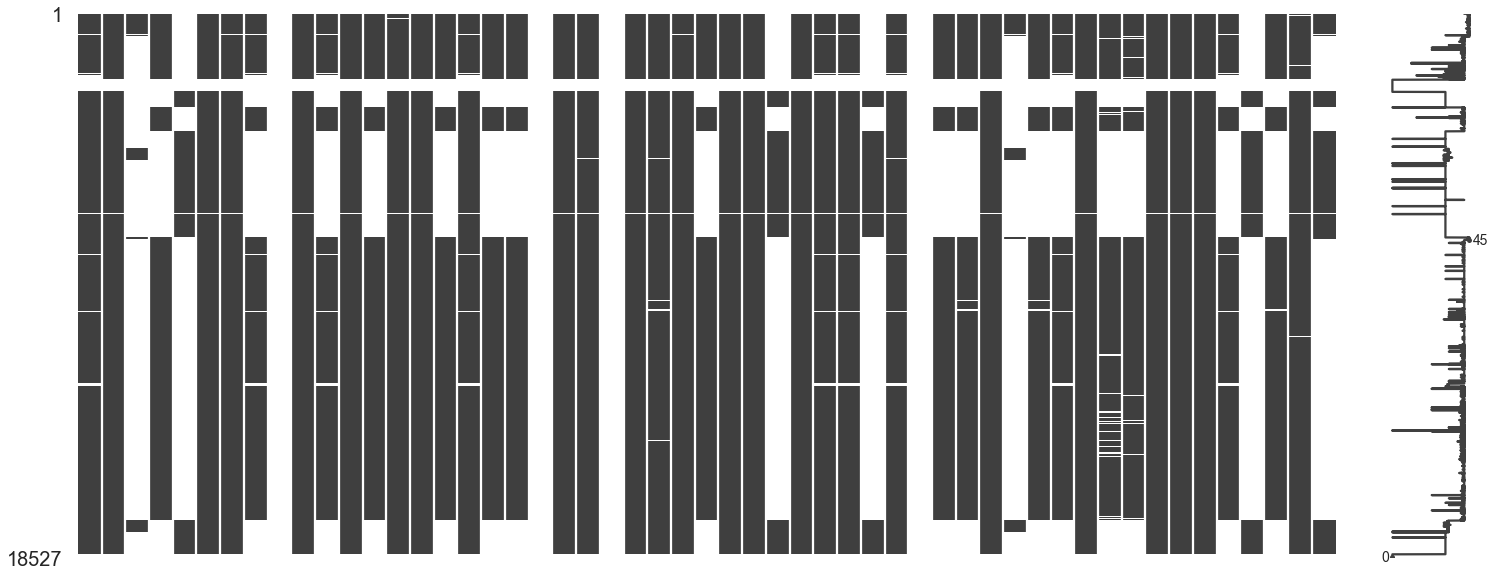

In [159]:
msno.matrix(nure.iloc[:,85:-8])

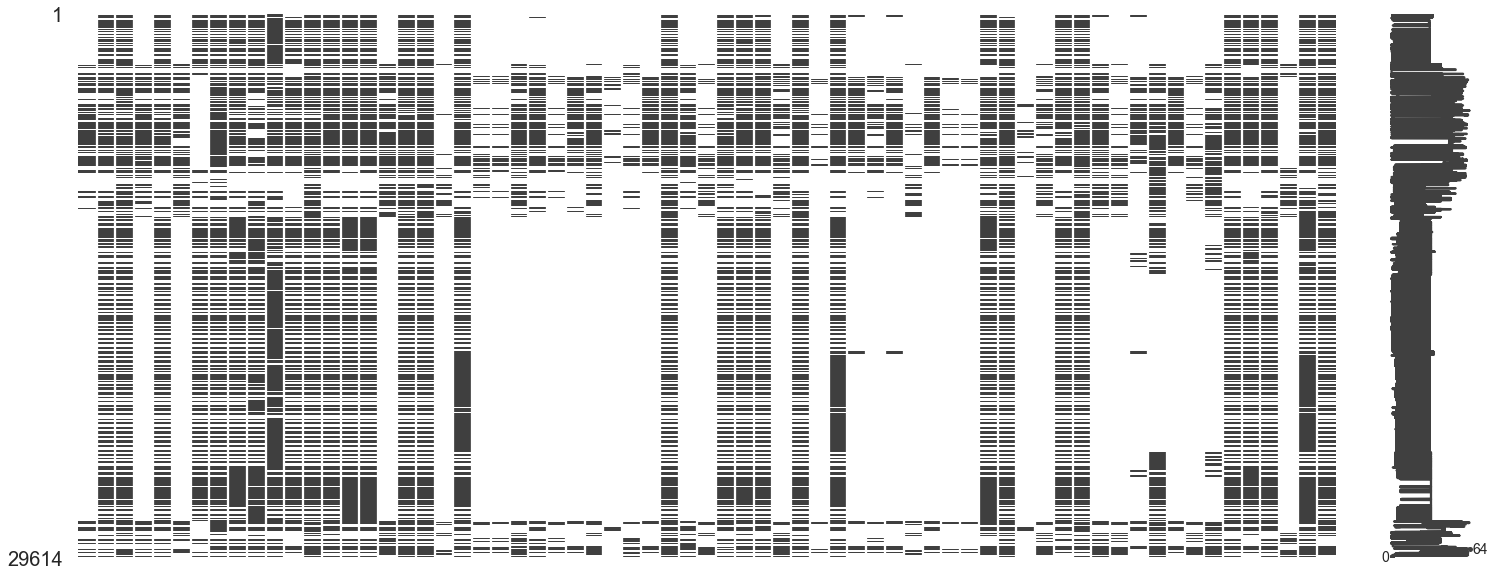

In [168]:
msno.matrix(merged.iloc[:,32:-4])

In [170]:
merged.iloc[:,32:-4].shape

(29614, 67)

In [171]:
nure.iloc[:,85:-8].shape

(18527, 53)

In [3]:
hucs = gpd.read_file(r'J:\Geology\WSGS\GIS\huc_12.shp')
hucs = hucs.to_crs(crs={'init': 'epsg:3732'})

In [67]:
crs = ccrs.Geodetic()
crs_proj4 = crs.proj4_init
df_ae = hucs2.to_crs(crs_proj4)

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x000001710F96EE60> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x000001710F96EE60> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x000001710F96EE60> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


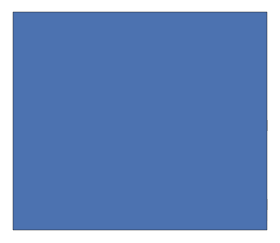

In [68]:
ax= df_ae.plot()
ax = plt.axes(projection=mapbox.crs)
ax.add_image(mapbox, 2)
#ax.imshow(mapbox, extent = [-111.5,-103.5,40.5,45.5, 2],'http://tile.stamen.com/terrain/tileZ/tileX/tileY.png', interpolation='bilinear')
ax.set_extent([-111.5,-103.5,40.5,45.5])
ax.add_geometries(df_ae['geometry'], crs=crs)


In [11]:
type(ax)

cartopy.mpl.geoaxes.GeoAxesSubplot

In [15]:
fig, ax = plt.subplots(subplot_kw={'projection': crs})
ax.add_geometries(df_ae['geometry'], crs=crs)

TypeError: projection must be a string, None or implement a _as_mpl_axes method. Got <cartopy._crs.Geodetic object at 0x000002347BE23D58>

<Figure size 432x288 with 0 Axes>

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\hypertools\tools\df2mat.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  plot_data = df_num.as_matrix()
C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\hypertools\tools\format_data.py:141: UserWarning: Missing data: Inexact solution computed with PPCA (see https://github.com/allentran/pca-magic for details)
  warnings.warn('Missing data: Inexact solution computed with PPCA (see https://github.com/allentran/pca-magic for details)')


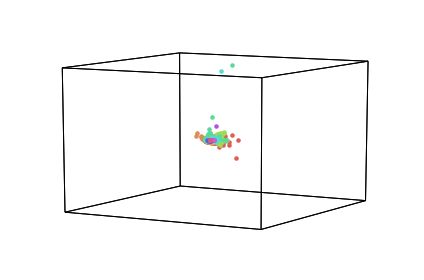

In [3]:
hyp.plot(nure.iloc[:,85:-8], '.',hue=cats, explore=True)

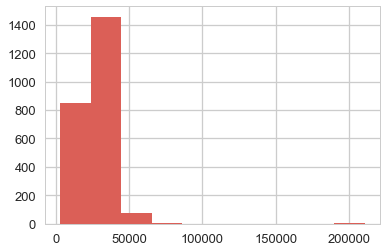

In [7]:
hucs.ACRES.hist()

In [31]:
hucs[hucs['ACRES']<3100].centroid.plot(ax=ax)

1790    POINT (1598079.972525683 531483.7231741798)
dtype: object

ValueError: Axes should be an instance of GeoAxes, got <class 'matplotlib.axes._subplots.AxesSubplot'>

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001715BF01D90> (for post_execute):


ValueError: Axes should be an instance of GeoAxes, got <class 'matplotlib.axes._subplots.AxesSubplot'>

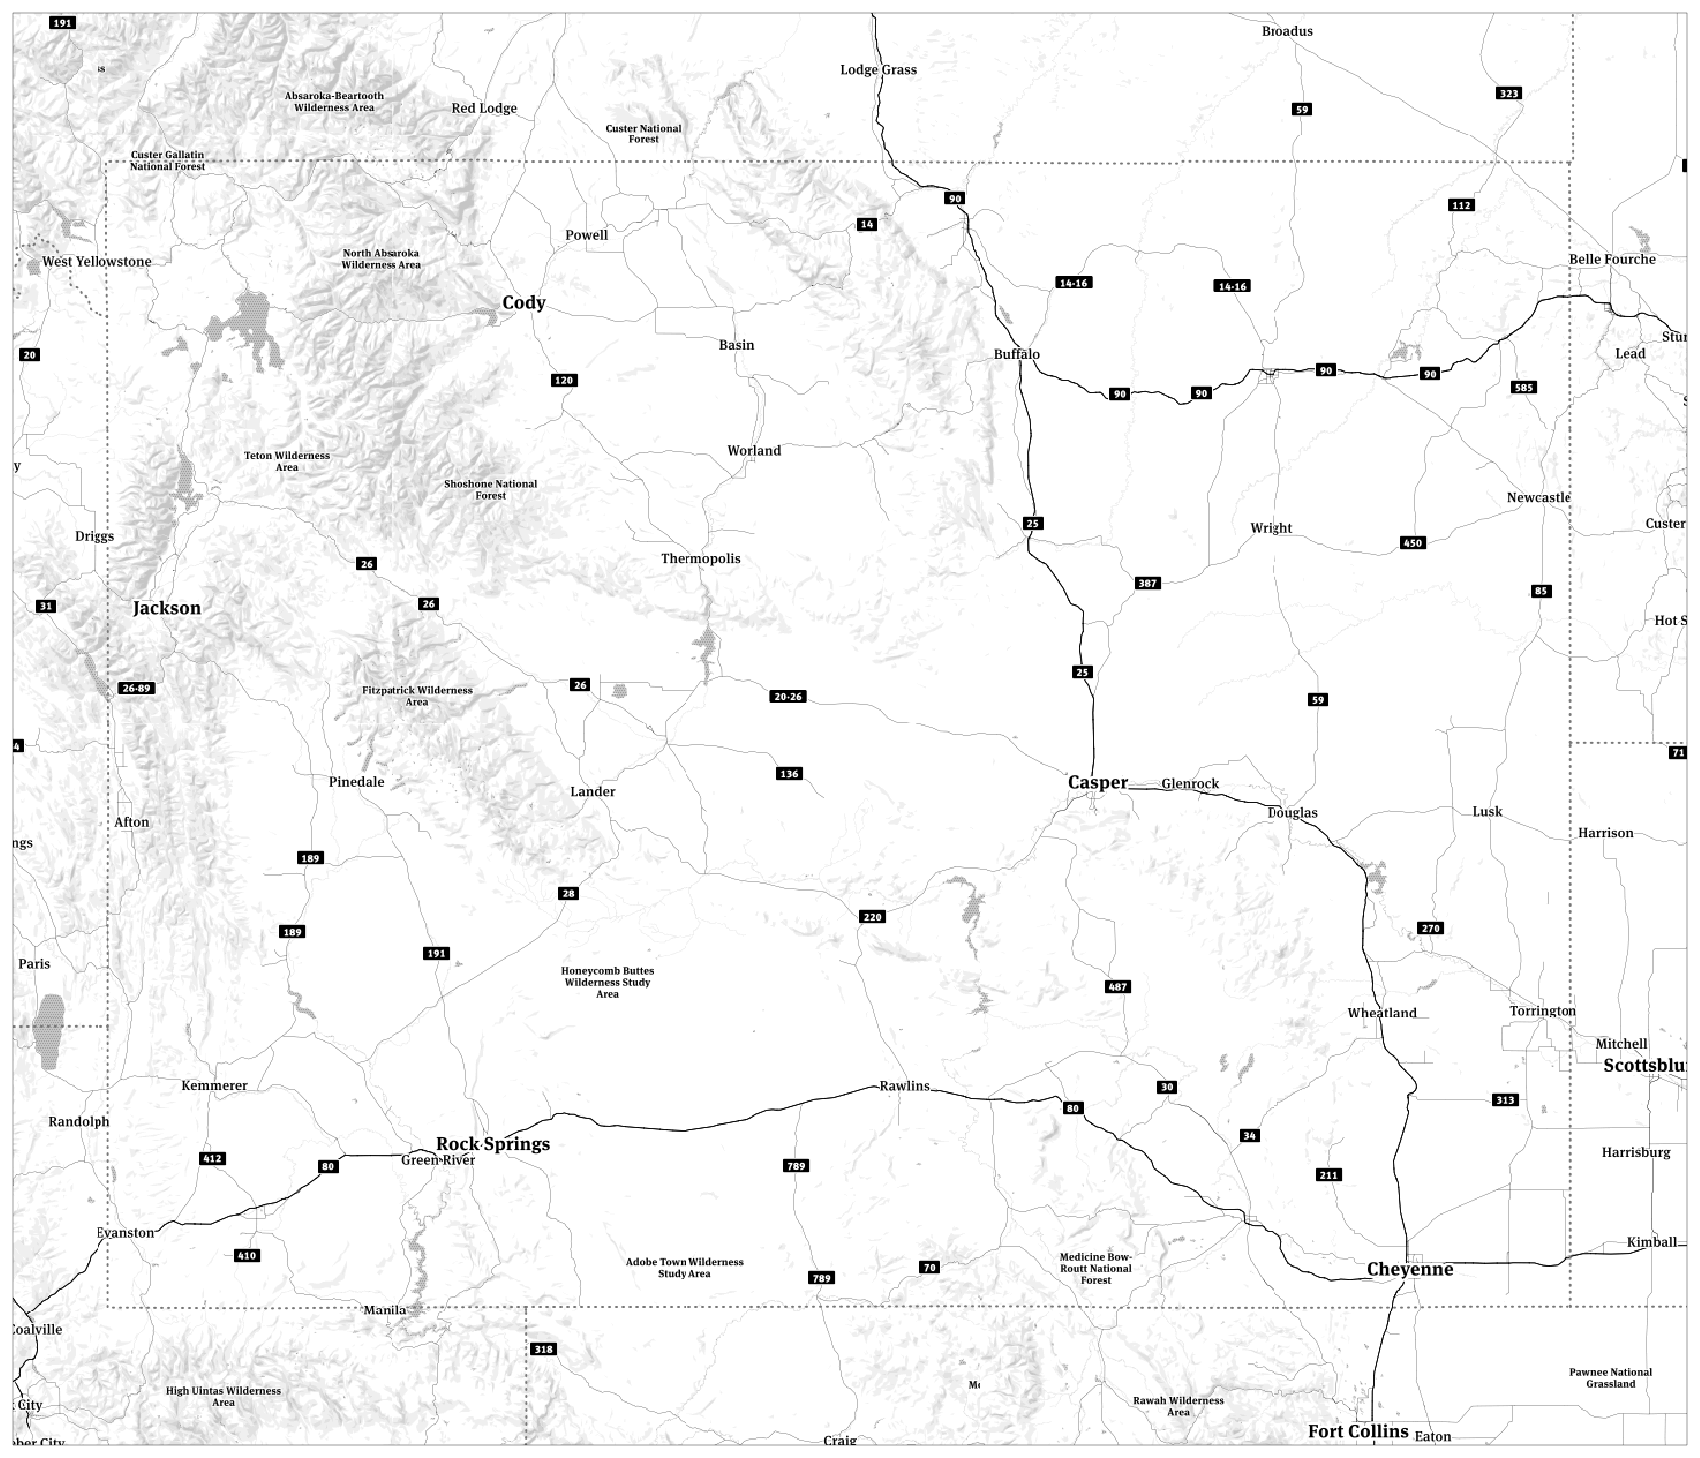

ValueError: Axes should be an instance of GeoAxes, got <class 'matplotlib.axes._subplots.AxesSubplot'>

<Figure size 432x288 with 1 Axes>

In [73]:
plt.figure(figsize=(30, 30))
ax = plt.axes(projection=mapbox.crs)
ax.add_image(mapbox, 8)

ax.set_extent([-111.5,-103.5,40.5,45.5])
plt.scatter(hucs2[hucs2['ACRES']<3100].centroid.x.values,hucs2[hucs2['ACRES']<3100].centroid.y.values,s=50,
            color='red', transform=ccrs.Geodetic())
hucs2.plot(column='ACRES', transform=ccrs.Geodetic())

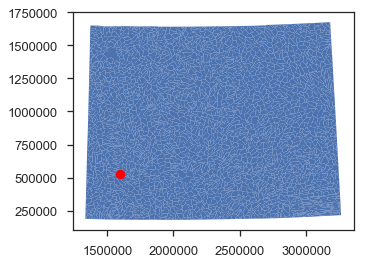

In [33]:
fig, ax=plt.subplots()
hucs.plot(ax=ax)
hucs[hucs['ACRES']<3100].centroid.plot(ax=ax, color='red')

In [65]:
crs = {'init': 'epsg:3857'} #http://www.spatialreference.org/ref/epsg/2263/
hucs2=hucs.to_crs(crs)

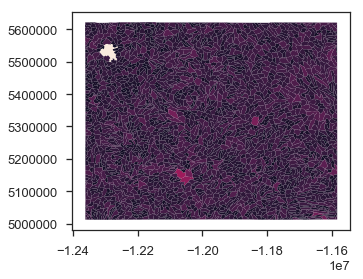

In [66]:
hucs2.plot(column='ACRES')